# Attribute importance ranking for synthetic data with known change points
The process change points are known. Hence, no change point detection algorithm needs to be used.

In [25]:
import pm4py
import helper
import pandas as pd

In [26]:
# data_file_path = 'data/synthetic/maardji et al 2013_xes_attributes/logs/ROI/ROI2.5k.xes'
# data_file_path = 'data/synthetic/maardji et al 2013_xes_attributes/logs/cb/cb10k.xes'
data_file_path = 'data\\synthetic\\maardji et al 2013_xes_attributes\\logs\\cb\\cb2.5k.xes'

## Load an event log

In [27]:
# Display the data info
data_info = helper.get_data_information(data_file_path)
data_info

change_points = data_info['change_points']

In [28]:
# load the event log into pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
event_log = xes_importer.apply(data_file_path)

parsing log, completed traces :: 100%|██████████| 2500/2500 [00:02<00:00, 949.27it/s] 


In [ ]:
from processdrift.framework import drift_detection
from processdrift.framework import drift_explanation
from processdrift.framework import feature_extraction
from processdrift.framework import pop_comparison
from processdrift.framework import windowing

In [ ]:
# # build the primary process drift detector
# primary_feature_extractor = feature_extraction.RelationalEntropyFeatureExtractor()
# primary_window_generator = windowing.FixedSizeWindowGenerator(window_size=150, slide_by=5)
# primary_population_comparer = pop_comparison.KSTestPopComparer()
# primary_threshold = 0.5
# primary_process_drift_detector = drift_detection.DriftDetector(primary_feature_extractor, 
#                                                                primary_window_generator,
#                                                                primary_population_comparer, 
#                                                                threshold=primary_threshold)

In [ ]:
# # build the primary process drift detector
# primary_feature_extractor = feature_extraction.RelationshipTypesCountFeatureExtractor('Relationship types count')
# primary_window_generator = windowing.FixedSizeWindowGenerator(window_size=150, slide_by=1)
# primary_population_comparer = pop_comparison.HotellingsTSquaredPopComparer()
# primary_threshold = 0.5
# primary_process_drift_detector = drift_detection.DriftDetector(primary_feature_extractor, 
#                                                                primary_window_generator,
#                                                                primary_population_comparer, 
#                                                                threshold=primary_threshold)

In [ ]:
# build the primary process drift detector
primary_feature_extractor = feature_extraction.RunsFeatureExtractor()
primary_window_generator = windowing.AdaptiveWindowGenerator(initial_window_size=100, slide_by=10)
primary_population_comparer = pop_comparison.HellingerDistanceComparer()
primary_threshold = 0.5
primary_process_drift_detector = drift_detection.DriftDetector(primary_feature_extractor, 
                                                               primary_window_generator,
                                                               primary_population_comparer, 
                                                               threshold=primary_threshold)

# primary_process_drift_detector = drift_detection.DriftDetectorTrueKnown(change_points)

In [ ]:
# generate random window
import itertools
gen = primary_window_generator.get_windows(event_log)

index = 10
window_a, window_b = next(itertools.islice(gen, index, None))
print(window_a.start)
print(window_b.start)

100
300


In [ ]:
# from processdrift import features
# trace_1 = ['a', 'b', 'c', 'd']
# trace_2 = ['a', 'c', 'b', 'd']
# log = [trace_1, trace_2]
# concurrencies = features.get_concurrency(log)
# print(concurrencies)
# concurrency_dict = features.get_concurrency_dict(concurrencies)
# concurrency_dict

In [ ]:
# traces = log
# runs = []

# for trace in traces:
#     edges = set()
#     for index_activity_1 in range(len(trace) - 1):
#         index_activity_2 = index_activity_1 + 1

#         activity_1 = trace[index_activity_1]
#         activity_2 = trace[index_activity_2]
#         edges.add((activity_1, activity_2))
    
#     run = set()
#     for edge in edges:
#         activity_1 = edge[0]
#         activity_2 = edge[1]
#         if activity_1 in concurrency_dict:
#             for conccurency in concurrency_dict[activity_1]:
#                 if conccurency == activity_2:
#                     run.add((activity_1, activity_2))
#                     run.add((activity_2, activity_1))
#                 else:
#                     run.add(edge)
#                     run.add((conccurency, activity_2))
#         if activity_2 in concurrency_dict:
#             for concurrency in concurrency_dict[activity_2]:
#                 if concurrency == activity_1:
#                     run.add((activity_1, activity_2))
#                     run.add((activity_2, activity_1))
#                 else:
#                     run.add(edge)
#                     run.add((activity_1, concurrency))
#         else:
#             run.add(edge)
#     runs.append(run)

# runs
# #     run = set()
# #     # get all edges that result from the trace
# #     # if an edge is among the global concurrency set, add its 
# #     # abcd, acbd -> ab ac
# #     for index_activity_1 in range(len(trace) - 1):
# #         index_activity_2 = index_activity_1 + 1

# #         activity_1 = trace[index_activity_1]
# #         activity_2 = trace[index_activity_2]

# #         # add edge to run
# #         edge = (activity_1, activity_2)
# #         print(edge)
# #         run.add(edge)
        
# #         if activity_1 in concurrency_dict and \
# #             activity_2 in concurrency_dict[activity_1]:
# #             edge = sorted((activity_1, activity_2))
# #             run.add(tuple(edge))
# #         else:
# #             if activity_1 in concurrency_dict:
# #                 for concurrent_activity in concurrency_dict[activity_1]:
# #                     edge = (concurrent_activity, activity_2)
# #                     if edge[0] != edge[1]:
# #                         run.add(edge)
# #             if activity_2 in concurrency_dict:
# #                 for concurrent_activity in concurrency_dict[activity_2]:
# #                     edge = (activity_1, concurrent_activity)
# #                     if edge[0] != edge[1]:
# #                         run.add(edge)
# #     runs.append(sorted(run))
# # runs

In [ ]:
features_window_a = primary_feature_extractor.extract(window_a.log)
features_window_b = primary_feature_extractor.extract(window_b.log)

In [ ]:
comp_result = primary_population_comparer.compare(features_window_a, features_window_b)
comp_result

0.23236527290058284

In [ ]:
preprocessed_a, preprocessed_b = primary_population_comparer._preprocess(features_window_a, features_window_b)

In [ ]:
display(preprocessed_a)
display(preprocessed_b)

[('Appraise_property', 'Assess_eligibility'), ('Appraise_property', 'Assess_loan_risk'), ('Appraise_property', 'Check_credit_history'), ('Assess_eligibility', 'Assess_eligibility'), ('Assess_eligibility', 'Reject_application'), ('Assess_loan_risk', 'Appraise_property'), ('Assess_loan_risk', 'Assess_eligibility'), ('Assess_loan_risk', 'Assess_loan_risk'), ('Assess_loan_risk', 'Check_credit_history'), ('Check__application__form_completeness', 'Appraise_property'), ('Check__application__form_completeness', 'Assess_loan_risk'), ('Check__application__form_completeness', 'Check__application__form_completeness'), ('Check__application__form_completeness', 'Check_credit_history'), ('Check_credit_history', 'Appraise_property'), ('Check_credit_history', 'Assess_loan_risk'), ('Loan__application_received', 'Check__application__form_completeness'), ('Loan__application_received', 'Loan__application_received'), ('Loan_application_rejected', 'Loan_application_rejected'), ('Reject_application', 'Loan_ap

[('Appraise_property', 'Assess_eligibility'), ('Appraise_property', 'Assess_loan_risk'), ('Appraise_property', 'Check_credit_history'), ('Assess_eligibility', 'Assess_eligibility'), ('Assess_eligibility', 'Reject_application'), ('Assess_loan_risk', 'Appraise_property'), ('Assess_loan_risk', 'Assess_eligibility'), ('Assess_loan_risk', 'Assess_loan_risk'), ('Assess_loan_risk', 'Check_credit_history'), ('Check__application__form_completeness', 'Appraise_property'), ('Check__application__form_completeness', 'Assess_loan_risk'), ('Check__application__form_completeness', 'Check__application__form_completeness'), ('Check__application__form_completeness', 'Check_credit_history'), ('Check_credit_history', 'Appraise_property'), ('Check_credit_history', 'Assess_loan_risk'), ('Loan__application_received', 'Check__application__form_completeness'), ('Loan__application_received', 'Loan__application_received'), ('Loan_application_rejected', 'Loan_application_rejected'), ('Reject_application', 'Loan_ap

In [ ]:
primary_population_comparer.compare(preprocessed_a, preprocessed_b)

0.607413805636881

In [ ]:
# # generate features
# features_window_a = primary_feature_extractor.extract(window_a.log)
# display(features_window_a.head())
# features_window_b = primary_feature_extractor.extract(window_b.log)
# display(features_window_b.head())

In [ ]:
# # perform test for features
# result = pop_comparison.HotellingsTSquaredPopComparer().compare(features_window_a, features_window_b)

In [ ]:
# build the secondary process drift detectors
secondary_window_generator = windowing.AdaptiveWindowGenerator(initial_window_size=100)
secondary_population_comparer = pop_comparison.HellingerDistanceComparer()
secondary_threshold = 0.7
secondary_exclude_attributes = ['concept:name']
secondary_drift_detectors = drift_detection.get_all_attribute_drift_detectors(event_log,
                                                                         secondary_window_generator, 
                                                                         secondary_population_comparer, 
                                                                         threshold=secondary_threshold,
                                                                         exclude_attributes=secondary_exclude_attributes)
# only select one secondary drift detector for debugging
secondary_drift_detectors = secondary_drift_detectors                                                      

In [ ]:
drift_explainer = drift_explanation.DriftExplainer(primary_process_drift_detector, secondary_drift_detectors)

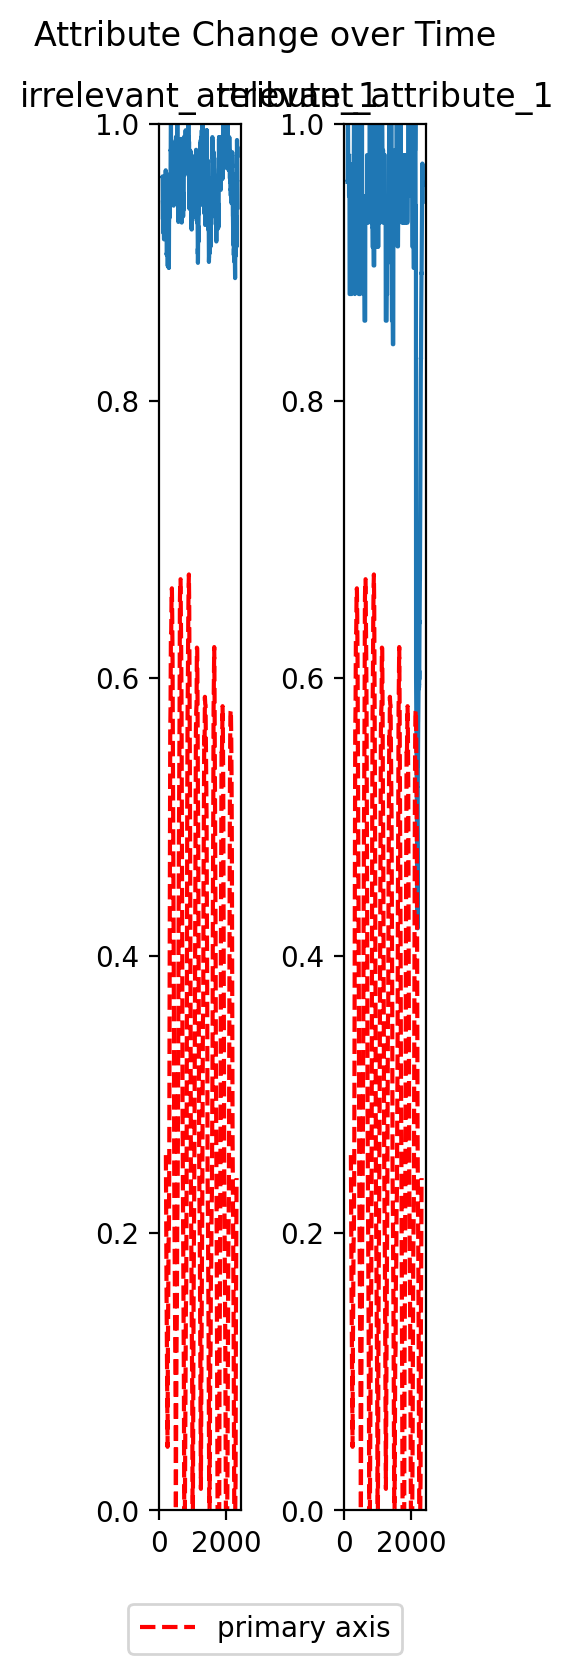

In [ ]:
primary_and_secondary_change_series = drift_explainer.get_primary_and_secondary_change_series(event_log)
drift_explanation.plot_primary_and_secondary_change_series(primary_and_secondary_change_series)

In [ ]:
# primary, secondaries = primary_and_secondary_change_series

In [ ]:
# drift_detection._get_change_points_from_series(secondaries['Attribute: relevant_attribute_4'], threshold=0.7, min_observations_below=3, min_distance_change_streaks=3)

In [ ]:
change_point_explanations = drift_explainer.attribute_importance_per_primary_change_point(event_log, max_distance=100)
change_point_explanations

{218: [], 448: [], 708: [], 958: [], 1198: [], 1458: [], 1728: []}